In [ ]:
#using cleaned-HIV
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [ ]:
#reading the data from the csv file
df = pd.read_csv('10YearPeriodHIV.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               75 non-null     object 
 1   Period2011             75 non-null     int64  
 2   ART coverage 2011      75 non-null     float64
 3   Death by HIV 2011      75 non-null     float64
 4   People with HIV 2011   75 non-null     float64
 5   Total Population 2011  75 non-null     float64
 6   Period2012             75 non-null     int64  
 7   ART coverage 2012      75 non-null     float64
 8   Death by HIV 2012      75 non-null     float64
 9   People with HIV 2012   75 non-null     float64
 10  Total Population 2012  75 non-null     float64
 11  Period2013             75 non-null     int64  
 12  ART coverage 2013      75 non-null     float64
 13  Death by HIV 2013      75 non-null     float64
 14  People with HIV 2013   75 non-null     float64
 15  Total Po

,Location,Period2011,ART coverage 2011,Death by HIV 2011,People with HIV 2011,Total Population 2011,Period2012,ART coverage 2012,Death by HIV 2012,People with HIV 2012,...,Period2020,ART coverage 2020,Death by HIV 2020,People with HIV 2020,Total Population 2020,Period2021,ART coverage 2021,Death by HIV 2021,People with HIV 2021,Total Population 2021
0,Equatorial Guinea,2011,10.0,1900.0,37000.0,986861.0,2012,15.0,2100.0,40000.0,...,2020,40.0,2300.0,64000.0,1402985.0,2021,41.0,2300.0,66000.0,1449891.0
1,Tajikistan,2011,10.0,200.0,6300.0,7697507.0,2012,12.0,200.0,7200.0,...,2020,63.0,200.0,13000.0,9537642.0,2021,65.0,200.0,13000.0,9749625.0
2,Angola,2011,10.0,16000.0,260000.0,24220660.0,2012,12.0,16000.0,270000.0,...,2020,35.0,16000.0,310000.0,32866268.0,2021,41.0,15000.0,320000.0,33933611.0
3,Sierra Leone,2011,11.0,4600.0,71000.0,6563238.0,2012,11.0,4400.0,72000.0,...,2020,50.0,3200.0,76000.0,7976985.0,2021,61.0,3000.0,76000.0,8141343.0
4,Latvia,2011,12.0,500.0,4600.0,2059709.0,2012,14.0,500.0,4800.0,...,2020,41.0,100.0,7400.0,1900449.0,2021,39.0,100.0,7800.0,1883162.0


In [ ]:
X = df.iloc[:50,[55,54]]
print(X)

    Total Population 2021  People with HIV 2021
0               1449891.0               66000.0
1               9749625.0               13000.0
2              33933611.0              320000.0
3               8141343.0               76000.0
4               1883162.0                7800.0
5              18275704.0                 810.0
6               2015490.0               40000.0
7               5180208.0               34000.0
8              19002586.0               35000.0
9                888456.0                 200.0
10             11935764.0                5400.0
11              4775110.0                9400.0
12               902899.0                1400.0
13             51265841.0              170000.0
14             39835428.0               11000.0
15             32776195.0               82000.0
16             27224262.0              500000.0
17              9340314.0               28000.0
18              2811666.0                1400.0
19              6702379.0               

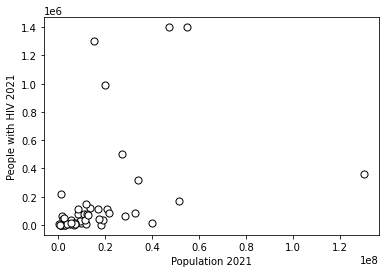

In [ ]:
#plotting
plt.scatter(
   df.iloc[:50,55], df.iloc[:50,54],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.xlabel("Population 2021")
plt.ylabel("People with HIV 2021")
plt.show()

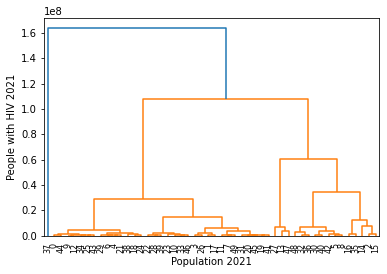

In [ ]:
data = list(zip(df.iloc[:50,55],df.iloc[:50,54]))

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.xlabel("Population 2021")
plt.ylabel("People with HIV 2021")
plt.show()

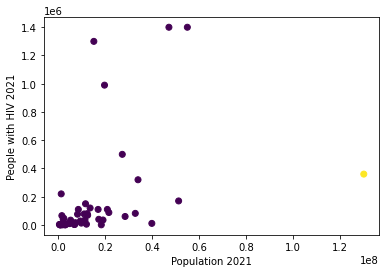

In [ ]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(df.iloc[:50,55],df.iloc[:50,54], c=labels)
plt.xlabel("Population 2021")
plt.ylabel("People with HIV 2021")
plt.show()

In [ ]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
print("David_bouldin_score: ",davies_bouldin_score(X, labels))
print("Silhoutte_score: ", silhouette_score(X, labels))
print("Calinski_harabasz_score: ",calinski_harabasz_score(X, labels))

David_bouldin_score:  0.0873060729360102
Silhoutte_score:  0.8511452768835661
Calinski_harabasz_score:  71.98141025755031
